# Обработка данных

## Подключение библиотек и считывание данных

In [120]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# считываем данные
data = pd.read_csv('../data/cars_data.csv', index_col=0)

data.head()

,id,mark,name,price,params
0,i4126437279,Audi,"Audi Q7 2.0 AT, 2023, 10 км",7500000,"10 км, 2.0 AT (252 л.с.), внедорожник, полный,..."
1,i4094029403,Audi,"Audi Q7 3.0 AT, 2010, 244 000 км",1570000,"244 000 км, 3.0 AT (333 л.с.), внедорожник, по..."
2,i4228945917,Audi,"Audi Q7 3.6 AT, 2010, 240 000 км",2200000,"240 000 км, 3.6 AT (280 л.с.), внедорожник, по..."
3,i4026986935,Audi,"Audi Q7 3.0 AT, 2020, 54 000 км",7650000,"54 000 км, 3.0 AT (249 л.с.), внедорожник, пол..."
4,i4221614908,Audi,"Audi Q7 2.0 AT, 2023, 200 км",9500000,"200 км, 2.0 AT (252 л.с.), внедорожник, полный..."


## Первичная обработка

### Обзор данных

In [122]:
# установим новый индекс
data.set_index('id', inplace=True)

In [123]:
# удалим дубликаты, посмотрим размерность
data.drop_duplicates(keep='first', inplace=True)
data.shape

(17818, 4)

In [124]:
# посмотрим на краткое описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17818 entries, i4126437279 to i4395822541
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mark    17818 non-null  object
 1   name    17818 non-null  object
 2   price   17818 non-null  int64 
 3   params  17818 non-null  object
dtypes: int64(1), object(3)
memory usage: 696.0+ KB


Пропущенных значений нет. Преобразуем признаки

In [125]:
data.sample(n=5)

,mark,name,price,params
id,,,,
i3699240293,Chevrolet,"Chevrolet Aveo 1.2 MT, 2007, 123 000 км",380000,"123 000 км, 1.2 MT (72 л.с.), седан, передний,..."
i4276359380,BMW,"BMW 5 серия 2.5 AT, 2007, 135 000 км",1538000,"135 000 км, 2.5 AT (218 л.с.), седан, задний, ..."
i3858589659,Nissan,"Nissan Qashqai 1.6 MT, 2013, 170 226 км",1128000,"170 226 км, 1.6 MT (114 л.с.), внедорожник, пе..."
i4022898343,Suzuki,"Suzuki SX4 1.6 AT, 2008, 190 000 км",625000,"190 000 км, 1.6 AT (106 л.с.), седан, передний..."
i4152995525,Kia,"Kia Rio 1.6 MT, 2011, 262 744 км",685000,"262 744 км, 1.6 MT (123 л.с.), седан, передний..."


В датасете есть новые автомобили (те, у которых пробег не указан), их учитывать не нужно. Удалим такие записи 

In [126]:
data['name'] = data['name'].apply(lambda x: x if 'км' in x else None)

In [127]:
data.dropna(inplace=True)

In [128]:
data.shape

(17085, 4)

### Признак - **release year**

Вытащим из колонки **name** год выпуска автомобиля

In [129]:
data['release year'] = data['name'].apply(lambda x: x.split(', ')[1])

In [130]:
data.sample(n=5)

,mark,name,price,params,release year
id,,,,,
i4156622524,Changan,"Changan UNI-K 2.0 AT, 2023, 30 км",3390000,"30 км, 2 AT (226 л.с.), внедорожник, полный, б...",2023
i4291609947,Hyundai,"Hyundai Accent 1.5 AT, 2005, 272 000 км",270000,"272 000 км, 1.5 AT (102 л.с.), седан, передний...",2005
i4151192235,Kia,"Kia Sportage 2.0 AT, 2012, 223 025 км",1270000,"223 025 км, 2.0 AT (150 л.с.), внедорожник, пе...",2012
i3712537321,ВАЗ (LADA),"ВАЗ (LADA) Vesta 1.6 MT, 2019, 160 000 км",920000,"160 000 км, 1.6 MT (106 л.с.), седан, передний...",2019
i3976499327,Toyota,"Toyota Roomy 1.0 CVT, 2019, 29 558 км",1250000,"29 558 км, 1.0 CVT (69 л.с.), минивэн, передни...",2019


### Признак - **is_crashed**

В датасете присутствуют *битые* авто. Сделаем отдельный признак

In [131]:
data['is_crashed'] = data['name'].apply(lambda x: True if 'битый' in x else False)

In [132]:
data.sample(n=5)

,mark,name,price,params,release year,is_crashed
id,,,,,,
i4292108811,Hyundai,"Hyundai Tucson 2.0 MT, 2018, 142 000 км",2090000,"142 000 км, 2.0 MT (150 л.с.), внедорожник, по...",2018,False
i4170406721,ГАЗ,"ГАЗ ГАЗель 3302 2.9 MT, 2008, 200 000 км",950000,"200 000 км, 2.9 MT (107 л.с.), фургон, задний,...",2008,False
i4004936941,ВАЗ (LADA),"ВАЗ (LADA) 2110 1.5 MT, 2002, 184 000 км",135000,"184 000 км, 1.5 MT (79 л.с.), седан, передний,...",2002,False
i4235913947,Renault,"Renault Logan Stepway 1.6 MT, 2019, 57 146 км",1159900,"57 146 км, 1.6 MT (82 л.с.), седан, передний, ...",2019,False
i4003322943,Audi,"Audi e-tron AT, 2020, 16 800 км",6149000,"16 800 км, AT (313 л.с.), внедорожник, полный,...",2020,False


### Признак - **name**

Оставим только название модели

In [133]:
data['name'] = data['name'].apply(lambda x: ' '.join(x.split(', ')[0].split()[:-2]))

In [134]:
data.sample(n=5)

,mark,name,price,params,release year,is_crashed
id,,,,,,
i4142230875,Ford,Ford Fusion,585000,"178 000 км, 1.4 MT (80 л.с.), хетчбэк, передни...",2008,False
i3113529046,Kia,Kia Cerato,2289990,"40 134 км, 2 AT (150 л.с.), седан, передний, б...",2021,False
i4297594154,Nissan,Nissan X-Trail,2130000,"95 276 км, 2.0 CVT (144 л.с.), внедорожник, по...",2018,False
i3861511789,Tank,Tank 300,3529000,"26 209 км, 2 AT (220 л.с.), внедорожник, полны...",2022,False
i3984274916,Kia,Kia Rio,927970,"157 857 км, 1.6 AT (123 л.с.), седан, передний...",2015,False


### Признак - **mileage**

Сначала уберем пометку "Битый" у соответствующих машин из колонки **params**

In [135]:
data['params'] = data['params'].apply(
    lambda x: x.replace("Битый, ", "") if "Битый" in x else x)

Из колонки **params** вытащим пробег

In [136]:
data['mileage'] = data['params'].apply(lambda x: x.split(', ')[0].replace('км', '').replace(' ', ''))

In [137]:
data.sample(n=5)

,mark,name,price,params,release year,is_crashed,mileage
id,,,,,,,
i4530285648,Toyota,Toyota RAV4,1198000,"217 000 км, 2 AT (152 л.с.), внедорожник, полн...",2007,False,217000
i4045968383,Geely,Geely Atlas,1720000,"94 000 км, 2.4 AT (149 л.с.), внедорожник, пол...",2018,False,94000
i4238406597,Renault,Renault Kaptur,1886000,"62 184 км, 2 MT (143 л.с.), внедорожник, полны...",2017,False,62184
i4164300175,ВАЗ (LADA),ВАЗ (LADA) Vesta,795000,"150 000 км, 1.6 MT (106 л.с.), седан, передний...",2016,False,150000
i3424257459,ГАЗ,ГАЗ Соболь 2752,590000,"181 000 км, 2.7 MT (107 л.с.), фургон, задний,...",2014,False,181000


### Признаки - **modification**, **body_type**, **drive**, **fuel_type**

**fuel_type** - тип топлива

In [138]:
data['fuel_type'] = data['params'].apply(lambda x: x.split(', ')[-1])

In [139]:
data['fuel_type'].value_counts()

fuel_type
бензин     15066
дизель      1885
гибрид        80
электро       38
газ           16
Name: count, dtype: int64

In [140]:
data.sample(n=5)

,mark,name,price,params,release year,is_crashed,mileage,fuel_type
id,,,,,,,,
i4043421332,Toyota,Toyota Land Cruiser Prado,2269000,"198 657 км, 4.0 AT (249 л.с.), внедорожник, по...",2007,False,198657,бензин
i3365458329,BMW,BMW 3 серия,1499000,"177 000 км, 1.6 AT (136 л.с.), седан, задний, ...",2013,False,177000,бензин
i3222331499,Toyota,Toyota Camry,3450000,"17 000 км, 2.5 AT (200 л.с.), седан, передний,...",2021,False,17000,бензин
i3946660521,Renault,Renault Megane,820000,"180 000 км, 2.0 CVT (138 л.с.), хетчбэк, перед...",2011,False,180000,бензин
i4119281409,Chery,Chery Tiggo (T11),585000,"167 000 км, 2.0 MT (136 л.с.), внедорожник, по...",2010,False,167000,бензин


**drive** - тип привода

In [141]:
data['drive'] = data['params'].apply(lambda x: x.split(', ')[-2])

In [142]:
data['drive'].value_counts()

drive
передний    10351
полный       5461
задний       1273
Name: count, dtype: int64

In [143]:
data.sample(n=5)

,mark,name,price,params,release year,is_crashed,mileage,fuel_type,drive
id,,,,,,,,,
i4272471329,ВАЗ (LADA),ВАЗ (LADA) 2104,250000,"500 км, 1.6 MT (74 л.с.), универсал, задний, б...",1990,False,500,бензин,задний
i4159724744,Mazda,Mazda 3,400000,"117 000 км, 1.6 MT (105 л.с.), хетчбэк, передн...",2005,True,117000,бензин,передний
i4276047912,Audi,Audi A4,1497000,"193 609 км, 2.0 AMT (211 л.с.), седан, полный,...",2010,False,193609,бензин,полный
i4145524256,ВАЗ (LADA),ВАЗ (LADA) Granta,829000,"77 000 км, 1.6 MT (106 л.с.), лифтбек, передни...",2019,False,77000,бензин,передний
i4346040085,ВАЗ (LADA),ВАЗ (LADA) Granta,495000,"104 108 км, 1.6 MT (87 л.с.), седан, передний,...",2015,False,104108,бензин,передний


**body_type** - тип кузова

In [144]:
data['body_type'] = data['params'].apply(lambda x: x.split(', ')[-3])

In [145]:
data['body_type'].value_counts()

body_type
внедорожник            6232
седан                  5635
хетчбэк                2314
универсал               735
фургон                  674
лифтбек                 643
минивэн                 325
пикап                   246
микроавтобус            154
купе                     76
кабриолет                20
1.6 MT хетчбэк            4
2.0 AT внедорожник        2
2.4 AT внедорожник        2
5.7 AT пикап              1
1.5 AT универсал          1
1 AMT хетчбэк             1
2.4 AT седан              1
1.6 MT универсал          1
1 MT хетчбэк              1
1.6 MT седан              1
1.3 MT седан              1
1.6 AT хетчбэк            1
1.6 AMT седан             1
1.8 AMT минивэн           1
2 CVT седан               1
1.8 AT седан              1
1.6 MT минивэн            1
2 CVT внедорожник         1
2.0 CVT седан             1
2 AT внедорожник          1
1.5 CVT седан             1
1.5 MT хетчбэк            1
2.3 AT купе               1
2.2 MT микроавтобус       1
1.6 AT сед

Есть записи, которые спарсились некорректно. Посмотрим, сколько таких.

In [146]:
data['params'].apply(lambda x: len(x.split(', '))).value_counts()

params
5    17054
4       31
Name: count, dtype: int64

Некорретных записей немного, удалим их

In [147]:
data['params'] = data['params'].apply(lambda x: x if len(x.split(', ')) == 5 else None)

In [148]:
data.dropna(inplace=True)

**modification** - модификация (объем двигателя, тип коробки передач, мощность)

In [149]:
data['modification'] = data['params'].apply(lambda x: x.split(', ')[-4])

In [150]:
data.sample(n=5)

,mark,name,price,params,release year,is_crashed,mileage,fuel_type,drive,body_type,modification
id,,,,,,,,,,,
i4160931473,ВАЗ (LADA),ВАЗ (LADA) Granta,377000,"152 907 км, 1.6 MT (87 л.с.), седан, передний,...",2012,False,152907,бензин,передний,седан,1.6 MT (87 л.с.)
i4134682734,ВАЗ (LADA),ВАЗ (LADA) Kalina,185000,"224 000 км, 1.6 MT (81 л.с.), седан, передний,...",2006,False,224000,бензин,передний,седан,1.6 MT (81 л.с.)
i3761722079,Nissan,Nissan Qashqai,1585000,"126 399 км, 2 CVT (144 л.с.), внедорожник, пер...",2019,False,126399,бензин,передний,внедорожник,2 CVT (144 л.с.)
i4497715025,Skoda,Skoda Kodiaq,2400000,"70 000 км, 1.4 MT (125 л.с.), внедорожник, пер...",2018,False,70000,бензин,передний,внедорожник,1.4 MT (125 л.с.)
i4163579316,ВАЗ (LADA),ВАЗ (LADA) 2114 Samara,549000,"12 000 км, 1.6 MT (81 л.с.), хетчбэк, передний...",2011,False,12000,бензин,передний,хетчбэк,1.6 MT (81 л.с.)


Удалим лишний теперь столбец **params**

In [151]:
data.drop(columns='params', inplace=True)

### Признак - **engine_capacity**, **transmission_type**, **engine_power**

**engine_capacity** - объем двигателя. Автомобили с электрическим типом двигателя не могут иметь такую характеристику, так как у них в принципе отсутствует камера сгорания топлива, по которой считается объем. Тогда можно сказать, что у электромобилей объем двигателя - 0 л и модель не будет учитывать данный признак

In [152]:
data.loc[data['fuel_type'] == 'электро', 'modification'] = data[data['fuel_type'] == 'электро']['modification'].apply(
    lambda x: '0 ' + x)

In [158]:
data['engine_capacity'] = data['modification'].apply(lambda x: x.split()[0])

**transmission_type** - тип трансмиссии

In [162]:
data['transmission_type'] = data['modification'].apply(lambda x: x.split()[1])

In [163]:
data.sample(n=5)

,mark,name,price,release year,is_crashed,mileage,fuel_type,drive,body_type,modification,engine_capacity,transmission_type
id,,,,,,,,,,,,
i3818664086,BMW,BMW X3,4850000,2021,False,61903,дизель,полный,внедорожник,2.0 AT (190 л.с.),2.0,AT
i4113271384,Volkswagen,Volkswagen Polo,1199000,2018,False,140954,бензин,передний,седан,1.6 MT (90 л.с.),1.6,MT
i4238049027,Chevrolet,Chevrolet Cruze,858000,2014,False,199704,бензин,передний,седан,1.6 MT (109 л.с.),1.6,MT
i3996802170,Volkswagen,Volkswagen Touareg,900000,2006,False,288800,дизель,полный,внедорожник,2.5 AT (174 л.с.),2.5,AT
i3543121190,Mercedes-Benz,Mercedes-Benz GL-класс AMG,3800000,2014,False,239000,бензин,полный,внедорожник,5.5 AT (557 л.с.),5.5,AT


## Обработка вещественных признаков

### Приведение к типу и описание

In [154]:
# посмотрим, какие колонки нужно преобразовать
data.dtypes

mark            object
name            object
price            int64
release year    object
is_crashed        bool
mileage         object
fuel_type       object
drive           object
body_type       object
modification    object
dtype: object

Приведем колонки **Год выпуска**, **Пробег**, **Объём двигателя**, **Мощность** к числовому типу

In [155]:
cols_to_num = ['Год выпуска', 'Пробег', 'Объём двигателя', 'Мощность']
data[cols_to_num] = data[cols_to_num].map(pd.to_numeric)

KeyError: "None of [Index(['Год выпуска', 'Пробег', 'Объём двигателя', 'Мощность'], dtype='object')] are in the [columns]"

In [ ]:
# Посмотрим на описание числовых признаков
data.describe()

,Год выпуска,Пробег,Объём двигателя,Цена,Мощность,Лет в эксплуатации
count,2109.000000,2109.000000,2109.000000,2.109000e+03,2109.000000,2109.000000
mean,2010.867236,134501.739213,1.847843,1.275330e+06,130.732101,11.057373
std,6.954952,82870.145173,0.582445,1.544960e+06,58.560554,5.474023
min,1977.000000,1.000000,0.000000,3.500000e+04,33.000000,1.000000
25%,2007.000000,80000.000000,1.600000,5.100000e+05,98.000000,7.000000
50%,2011.000000,130000.000000,1.600000,8.950000e+05,114.000000,11.000000
75%,2016.000000,179900.000000,2.000000,1.530000e+06,150.000000,14.000000
max,2024.000000,1000000.000000,6.200000,2.500000e+07,717.000000,39.000000


### Обработка выбросов

Напишем функцию, которая будет возвращать верхнюю и нижнюю границу усиков `boxplot`

In [ ]:
def low_up_bounds(feature, coef=1.5):
    # Расчитаем длину усиков
    q_low = data[feature].quantile(0.25)
    q_high = data[feature].quantile(0.75)

    tentacle_length = q_high - q_low

    # вычислим верхнюю и нижнюю границы
    upper_tentacle = q_high + coef * tentacle_length
    lower_tentacle = q_low - coef * tentacle_length

    return lower_tentacle, upper_tentacle

Признак - **Год выпуска**

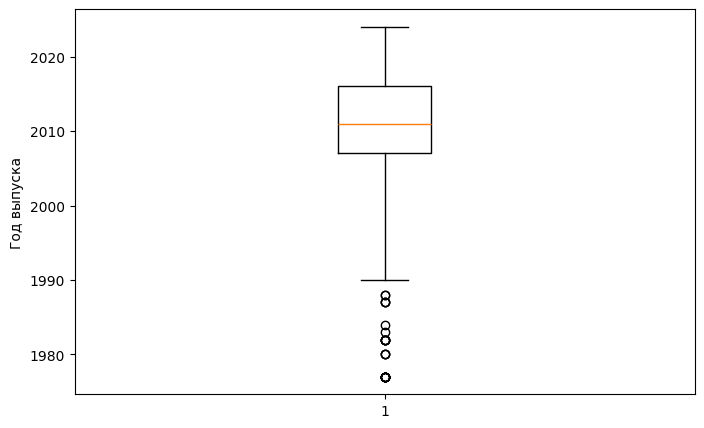

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 5)

plt.boxplot(data['Год выпуска'], whis=2)
plt.ylabel('Год выпуска')

plt.show()

In [ ]:
# посмотрим, сколько выбросов
low_year, up_year = low_up_bounds('Год выпуска', 2)

data[data['Год выпуска'] <= int(low_year)].shape[0]

29

In [ ]:
# удалим выбросы
data = data[data['Год выпуска'] > int(low_year)]

In [ ]:
data.shape

(2080, 17)

Признак - **Пробег**

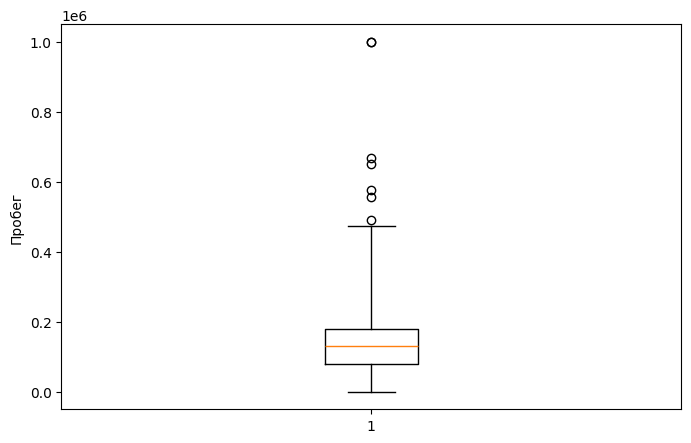

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 5)

plt.boxplot(data['Пробег'], whis=3)
plt.ylabel('Пробег')

plt.show()

In [ ]:
# посмотрим, сколько выбросов
low, up = low_up_bounds('Пробег', 3)

data[data['Пробег'] >= int(up)].shape[0]

7

In [ ]:
# удалим выбросы
data = data[data['Пробег'] < int(up)]

In [ ]:
data.shape

(2073, 17)

Признак - **Цена**

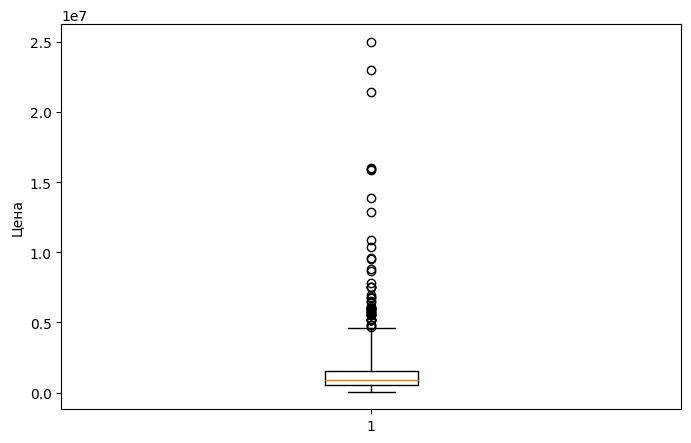

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 5)

plt.boxplot(data['Цена'], whis=3)
plt.ylabel('Цена')

plt.show()

In [ ]:
# посмотрим, сколько выбросов
low, up = low_up_bounds('Цена', 3)

data[data['Цена'] >= int(up)].shape[0]

47

Выбросов по цене очень много даже для такой большой длины усов. Посмотрим на данные и удалим только самые большие выбросы

In [ ]:
data.sort_values(by='Цена', ascending=False).head(10)

,Год выпуска,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,Название,Цена,Обмен,Мощность,Лет в эксплуатации
954,2002,500,Оригинал,3,Не битый,4.7,Бензин,Автомат,Полный,Внедорожник 5-дверный,Чёрный,Левый,Toyota Land Cruiser,25000000,Не интересует,235,23
14,2021,1000,Электронный,1,Не битый,3.0,Дизель,Автомат,Полный,Внедорожник 5-дверный,Чёрный,Левый,Land Rover Range Rover,23000000,Не интересует,350,2
41,2018,9000,Электронный,1,Не битый,4.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Mercedes-Benz G-класс AMG,21400000,Возможен,585,5
89,2019,31620,Не указан,2,Не битый,4.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Чёрный,Левый,Mercedes-Benz GLS-класс AMG,16000000,Не интересует,612,4
32,2019,500,Электронный,1,Не битый,4.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Чёрный,Левый,Audi RS Q8,15900000,Не интересует,600,2
1816,2022,3275,Оригинал,1,Не битый,3.0,Дизель,Автомат,Полный,Внедорожник 5-дверный,Серый,Левый,Land Rover Range Rover Sport,15890000,Возможен,300,3
19,2023,45,Оригинал,1,Не битый,3.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,BMW X6,13890000,Возможен,381,2
1418,2023,8020,Электронный,1,Не битый,3.0,Дизель,Автомат,Полный,Внедорожник 5-дверный,Серый,Левый,BMW X5,12890000,Возможен,298,2
5,2019,57,Электронный,1,Не битый,6.2,Бензин,Автомат,Полный,Пикап,Чёрный,Левый,Chevrolet Silverado,10890000,Возможен,420,3
1620,2022,40,Электронный,1,Не битый,2.4,Бензин,Автомат,Полный,Внедорожник 5-дверный,Чёрный,Левый,Lexus RX,10390000,Возможен,279,2


In [ ]:
# удалим авто дороже 16 млн
data = data[data['Цена'] <= 16 * (10 ** 6)]

In [ ]:
data.shape

(2070, 17)

Признаки - **Мощность** и **Объем двигателя**

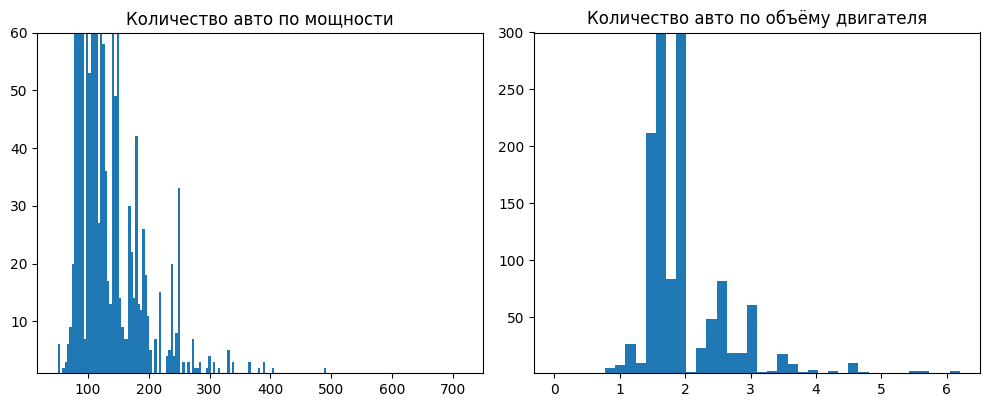

In [ ]:
fig = plt.figure()

fig.set_size_inches(10, 4)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(data['Мощность'], bins=data['Мощность'].unique().shape[0])
plt.ylim((1, 60))

ax_2 = fig.add_subplot(1, 2, 2)
plt.hist(data['Объём двигателя'], bins=data['Объём двигателя'].unique().shape[0])
plt.ylim((1, 300))

fig.tight_layout()

ax_1.set(title = 'Количество авто по мощности')
ax_2.set(title = 'Количество авто по объёму двигателя')

plt.show()

Удалим авто с мощностью больше 400 л.с. и объемом двигателя больше 5 л

In [ ]:
data = data[(data['Мощность'] <= 400) & (data['Объём двигателя'] <= 5)]

Посмотрим на матрицу корелляций числовых признаков

In [ ]:
# берем столбцы, содержащие числовой тип
numeric_columns = data.loc[:,data.dtypes!=object].columns

In [ ]:
# посмотрим корелляции
data[numeric_columns].corr()

,Год выпуска,Пробег,Объём двигателя,Цена,Мощность,Лет в эксплуатации
Год выпуска,1.000000,-0.622258,0.003683,0.518489,0.217992,-0.929461
Пробег,-0.622258,1.000000,0.153141,-0.370928,0.007756,0.698695
Объём двигателя,0.003683,0.153141,1.000000,0.488828,0.781933,0.055788
Цена,0.518489,-0.370928,0.488828,1.000000,0.687758,-0.491199
Мощность,0.217992,0.007756,0.781933,0.687758,1.000000,-0.124886
Лет в эксплуатации,-0.929461,0.698695,0.055788,-0.491199,-0.124886,1.000000


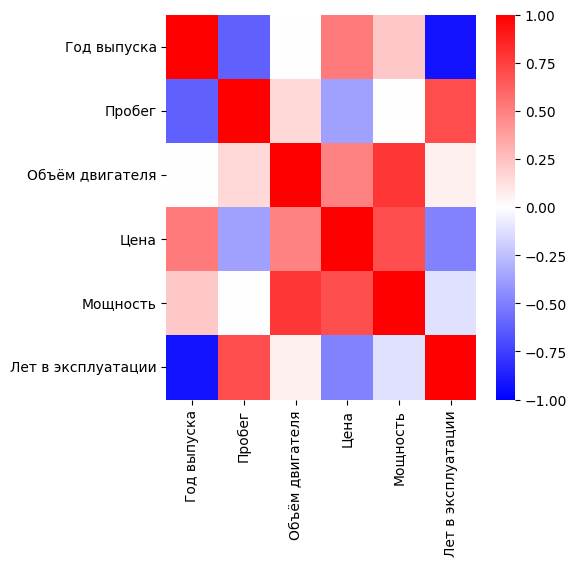

In [ ]:
# сделаем тепловую карту
fig = plt.figure()
fig.set_size_inches(5, 5)

corr_matrix = data[numeric_columns].corr()

sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            cmap='bwr',
            vmin=-1,
            vmax=+1)

plt.show()

Очень сильная корелляция между **Год выпуска** и **Лет в эксплуатации**. Оставим только 1 признак - **Лет в эксплуатации**

In [ ]:
data.drop(columns='Год выпуска', inplace=True)

## Обработка категориальных признаков

In [ ]:
data.head()

,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,Название,Цена,Обмен,Мощность,Лет в эксплуатации
0,156000,Оригинал,2,Не битый,2.3,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Mazda CX-7,1050000,Не интересует,238,15
1,109000,Оригинал,1,Не битый,3.0,Дизель,Автомат,Полный,Внедорожник 5-дверный,Синий,Левый,BMW X7,8800000,Не интересует,400,5
2,15,Не указан,1,Не битый,2.0,Бензин,Робот,Полный,Внедорожник 5-дверный,Чёрный,Левый,EXEED RX,3730000,Не интересует,249,2
4,10,Электронный,1,Не битый,2.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Geely Monjaro,3600000,Не интересует,238,1
6,123691,Не указан,2,Не битый,1.6,Бензин,Механика,Передний,Хетчбек 5-дверный,Золотой,Левый,Renault Sandero,999000,Не интересует,113,8


### Признак - **ПТС**

In [ ]:
# посмотрим на распределение
data['ПТС'].value_counts()

ПТС
Оригинал       970
Не указан      725
Электронный    207
Дубликат       151
Name: count, dtype: int64

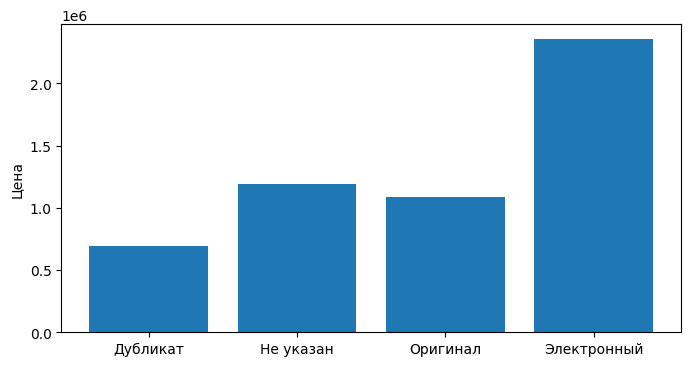

In [ ]:
fig = plt.figure()

fig.set_size_inches(8, 4)

plt.bar(sorted(list(data['ПТС'].unique())), data.groupby(
    'ПТС', as_index=False)['Цена'].mean()['Цена'])

plt.ylabel('Цена')

plt.show()

Видно, что цена зависит от формата ПТС. Закодируем этот признак через One-Hot

In [ ]:
one_hot = pd.get_dummies(data['ПТС'], prefix='Формат ПТС', prefix_sep=' - ')
one_hot.head()

,Формат ПТС - Дубликат,Формат ПТС - Не указан,Формат ПТС - Оригинал,Формат ПТС - Электронный
0,False,False,True,False
1,False,False,True,False
2,False,True,False,False
4,False,False,False,True
6,False,True,False,False


In [ ]:
# удалим столбец "Формат ПТС - Не указан" для
# предотвращения мультиколлинеарности и соединим с датасетом
data = pd.concat((data.drop(columns='ПТС'), one_hot.drop(
    columns='Формат ПТС - Не указан')), axis=1)

### Признак - **Владельцев по ПТС**

In [ ]:
data.head()

,Пробег,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,Название,Цена,Обмен,Мощность,Лет в эксплуатации,Формат ПТС - Дубликат,Формат ПТС - Оригинал,Формат ПТС - Электронный
0,156000,2,Не битый,2.3,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Mazda CX-7,1050000,Не интересует,238,15,False,True,False
1,109000,1,Не битый,3.0,Дизель,Автомат,Полный,Внедорожник 5-дверный,Синий,Левый,BMW X7,8800000,Не интересует,400,5,False,True,False
2,15,1,Не битый,2.0,Бензин,Робот,Полный,Внедорожник 5-дверный,Чёрный,Левый,EXEED RX,3730000,Не интересует,249,2,False,False,False
4,10,1,Не битый,2.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Geely Monjaro,3600000,Не интересует,238,1,False,False,True
6,123691,2,Не битый,1.6,Бензин,Механика,Передний,Хетчбек 5-дверный,Золотой,Левый,Renault Sandero,999000,Не интересует,113,8,False,False,False


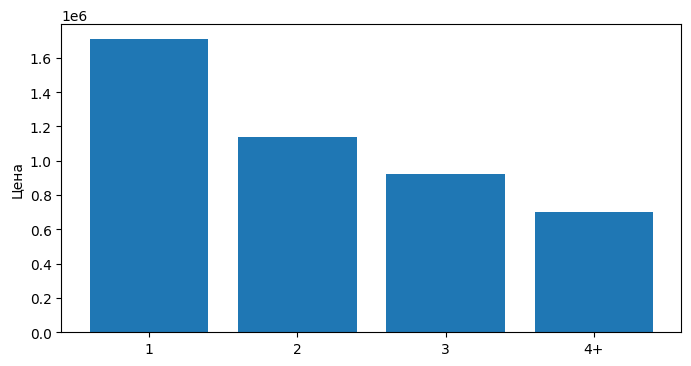

In [ ]:
fig = plt.figure()

fig.set_size_inches(8, 4)

plt.bar(sorted(list(data['Владельцев по ПТС'].unique())), data.groupby(
    'Владельцев по ПТС', as_index=False)['Цена'].mean()['Цена'])

plt.ylabel('Цена')

plt.show()

Видно, что цена зависит от количества владельцев. Закодируем этот признак через One-Hot

In [ ]:
one_hot = pd.get_dummies(data['Владельцев по ПТС'],
                         prefix='Количество владельцев', prefix_sep=' - ')
one_hot.head()

,Количество владельцев - 1,Количество владельцев - 2,Количество владельцев - 3,Количество владельцев - 4+
0,False,True,False,False
1,True,False,False,False
2,True,False,False,False
4,True,False,False,False
6,False,True,False,False


In [ ]:
# удалим столбец "Количество владельцев - 4+" для
# предотвращения мультиколлинеарности и соединим с датасетом
data = pd.concat((data.drop(columns='Владельцев по ПТС'), one_hot.drop(
    columns='Количество владельцев - 4+')), axis=1)

### Признак - **Состояние**

In [ ]:
data.head()

,Пробег,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,Название,Цена,Обмен,Мощность,Лет в эксплуатации,Формат ПТС - Дубликат,Формат ПТС - Оригинал,Формат ПТС - Электронный,Количество владельцев - 1,Количество владельцев - 2,Количество владельцев - 3
0,156000,Не битый,2.3,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Mazda CX-7,1050000,Не интересует,238,15,False,True,False,False,True,False
1,109000,Не битый,3.0,Дизель,Автомат,Полный,Внедорожник 5-дверный,Синий,Левый,BMW X7,8800000,Не интересует,400,5,False,True,False,True,False,False
2,15,Не битый,2.0,Бензин,Робот,Полный,Внедорожник 5-дверный,Чёрный,Левый,EXEED RX,3730000,Не интересует,249,2,False,False,False,True,False,False
4,10,Не битый,2.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Geely Monjaro,3600000,Не интересует,238,1,False,False,True,True,False,False
6,123691,Не битый,1.6,Бензин,Механика,Передний,Хетчбек 5-дверный,Золотой,Левый,Renault Sandero,999000,Не интересует,113,8,False,False,False,False,True,False


In [ ]:
data['Состояние'].value_counts()

Состояние
Не битый    2040
Битый         13
Name: count, dtype: int64

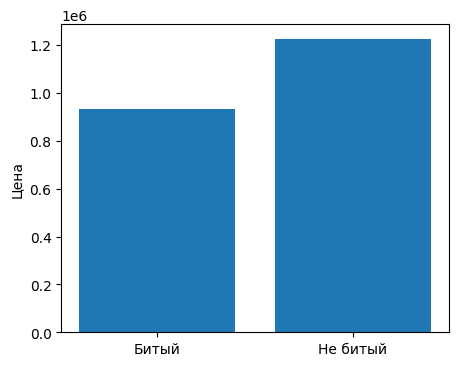

In [ ]:
fig = plt.figure()

fig.set_size_inches(5, 4)

plt.bar(sorted(list(data['Состояние'].unique())),
        data.groupby('Состояние')['Цена'].mean().values)

plt.ylabel('Цена')

plt.show()

Битые машины в среднем стоят дешевле. Сделаем данный признак бинарным, переименуем в **Битый**

In [ ]:
data.rename({'Состояние': 'Битый'})

,Пробег,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,Название,Цена,Обмен,Мощность,Лет в эксплуатации,Формат ПТС - Дубликат,Формат ПТС - Оригинал,Формат ПТС - Электронный,Количество владельцев - 1,Количество владельцев - 2,Количество владельцев - 3
0,156000,Не битый,2.3,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Mazda CX-7,1050000,Не интересует,238,15,False,True,False,False,True,False
1,109000,Не битый,3.0,Дизель,Автомат,Полный,Внедорожник 5-дверный,Синий,Левый,BMW X7,8800000,Не интересует,400,5,False,True,False,True,False,False
2,15,Не битый,2.0,Бензин,Робот,Полный,Внедорожник 5-дверный,Чёрный,Левый,EXEED RX,3730000,Не интересует,249,2,False,False,False,True,False,False
4,10,Не битый,2.0,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Geely Monjaro,3600000,Не интересует,238,1,False,False,True,True,False,False
6,123691,Не битый,1.6,Бензин,Механика,Передний,Хетчбек 5-дверный,Золотой,Левый,Renault Sandero,999000,Не интересует,113,8,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,106000,Не битый,1.6,Бензин,Механика,Передний,Седан,Зелёный,Левый,ВАЗ (LADA) Priora,420000,Возможен,98,13,False,True,False,False,True,False
2105,185199,Не битый,1.6,Бензин,Механика,Передний,Седан,Серебряный,Левый,ВАЗ (LADA) Granta,290000,Возможен,87,13,False,True,False,False,False,True
2106,194000,Не битый,1.4,Бензин,Автомат,Передний,Седан,Белый,Левый,Kia Rio,749999,Не интересует,107,8,False,False,False,False,False,False
2107,19774,Не битый,1.7,Бензин,Механика,Полный,Внедорожник 3-дверный,Серый,Левый,ВАЗ (LADA) Niva Legend,920000,Не интересует,83,3,False,False,False,True,False,False
